<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



In [2]:
import os
os.getcwd()

'/Users/oscarbello/Documents/python/IBM Python Data Science'

<b>Importing the Data</b>


Load the csv:


In [3]:
df = pd.read_csv('drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [6]:
#dfRev = df.drop(["beer_servings", "spirit_servings", "total_litres_of_pure_alcohol"], axis = 1, inplace = True)
#dfRev.head()

df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [7]:
df_wineContinent = df.drop(["beer_servings", "spirit_servings", "total_litres_of_pure_alcohol"], axis = 1)
df_wineContinent.groupby(["wine_servings", "continent"], as_index = False)

#df_wineContinent.drop(["beer_servings", "spirit_servings", "total_litres_of_pure_alcohol"], axis = 1, inplace = True)

print(df_wineContinent.head(20))
#print(df_wineContinent.describe())

              country  wine_servings      continent
0         Afghanistan              0           Asia
1             Albania             54         Europe
2             Algeria             14         Africa
3             Andorra            312         Europe
4              Angola             45         Africa
5   Antigua & Barbuda             45  North America
6           Argentina            221  South America
7             Armenia             11         Europe
8           Australia            212        Oceania
9             Austria            191         Europe
10         Azerbaijan              5         Europe
11            Bahamas             51  North America
12            Bahrain              7           Asia
13         Bangladesh              0           Asia
14           Barbados             36  North America
15            Belarus             42         Europe
16            Belgium            212         Europe
17             Belize              8  North America
18          

<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [8]:
dfBeerCont = df.drop(["spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"], axis = 1)
dfBeerCont.head(10)

,country,beer_servings,continent
0,Afghanistan,0,Asia
1,Albania,89,Europe
2,Algeria,25,Africa
3,Andorra,245,Europe
4,Angola,217,Africa
5,Antigua & Barbuda,102,North America
6,Argentina,193,South America
7,Armenia,21,Europe
8,Australia,261,Oceania
9,Austria,279,Europe


In [9]:
print(dfBeerCont['continent'].value_counts())
#print(dfBeerCont['country'].value_counts())

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64


In [10]:
#dfBeerCont['continent'].values

In [11]:
beerAsia = dfBeerCont['continent'] == 'Asia'
beerEurope = dfBeerCont['continent'] == 'Europe'
beerAfrica = dfBeerCont['continent'] == 'Africa'
beerOceania = dfBeerCont['continent'] == 'Oceania'
beerNorthAmer = dfBeerCont['continent'] == 'North America'
beerSouthAmer = dfBeerCont['continent'] == 'South America'

df_asia = dfBeerCont[beerAsia]
df_europe = dfBeerCont[beerEurope]
df_africa = dfBeerCont[beerAfrica]
df_oceania = dfBeerCont[beerOceania]
df_namerica = dfBeerCont[beerNorthAmer]
df_samerica = dfBeerCont[beerSouthAmer]

print("Statistical summary for ASIA: ", df_asia.describe(), '\n')
print("Statistical summary for EUROPE: ", df_europe.describe(), '\n')
print("Statistical summary for AFRICA: ", df_africa.describe(), '\n')
print("Statistical summary for OCEANIA: ", df_oceania.describe(), '\n')
print("Statistical summary for N. AMERICA: ", df_namerica.describe(), '\n')
print("Statistical summary for S. AMERICA: ", df_samerica.describe(), '\n')

Statistical summary for ASIA:         beer_servings
count      44.000000
mean       37.045455
std        49.469725
min         0.000000
25%         4.250000
50%        17.500000
75%        60.500000
max       247.000000 

Statistical summary for EUROPE:         beer_servings
count      45.000000
mean      193.777778
std        99.631569
min         0.000000
25%       127.000000
50%       219.000000
75%       270.000000
max       361.000000 

Statistical summary for AFRICA:         beer_servings
count      53.000000
mean       61.471698
std        80.557816
min         0.000000
25%        15.000000
50%        32.000000
75%        76.000000
max       376.000000 

Statistical summary for OCEANIA:         beer_servings
count      16.000000
mean       89.687500
std        96.641412
min         0.000000
25%        21.000000
50%        52.500000
75%       125.750000
max       306.000000 

Statistical summary for N. AMERICA:         beer_servings
count      23.000000
mean      145.434783
std  

In [12]:
#print(df_asia.head())

In [13]:
df_oneHot = pd.get_dummies(df['continent'])
df_oneHot.head(3)

,Africa,Asia,Europe,North America,Oceania,South America
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


In [14]:
dfREV = df.drop(["country", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"], axis = 1)

In [15]:
#dfREV.head(2)
dfBeer = pd.concat([dfREV, df_oneHot], axis = 1)
dfBeer.head(2)

,beer_servings,continent,Africa,Asia,Europe,North America,Oceania,South America
0,0,Asia,0,1,0,0,0,0
1,89,Europe,0,0,1,0,0,0


In [16]:
from scipy import stats
#df_asia, df_europe, df_africa, df_oceania, df_namerica, df_samerica
#use original dataframe instead to correlate continent vs beer servings

#Pearson correlation and p-value for continent vs beer servings:
pearsonAfrica, p_valAfrica = stats.pearsonr(dfBeer['Africa'], dfBeer['beer_servings'])
pearsonAsia, p_valAsia = stats.pearsonr(dfBeer['Asia'], dfBeer['beer_servings'])
pearsonNAmer, p_valNAmer = stats.pearsonr(dfBeer['North America'], dfBeer['beer_servings'])
pearsonSAmer, p_valSAmer = stats.pearsonr(dfBeer['South America'], dfBeer['beer_servings'])
pearsonEurope, p_valEurope = stats.pearsonr(dfBeer['Europe'], dfBeer['beer_servings'])
pearsonOceania, p_valOceania = stats.pearsonr(dfBeer['Oceania'], dfBeer['beer_servings'])

print("Pearson: ", pearsonAfrica, " P-value: ", p_valAfrica, " for Africa vs Beer servings | STRONG Negative correlation + High certainty")
print("Pearson: ", pearsonAsia, " P-value: ", p_valAsia, " for Asia vs Beer servings | STRONG Negative correlation + Null certainty")
print("Pearson: ", pearsonNAmer, " P-value: ", p_valNAmer, " for North America vs Beer servings | STRONG Positive correlation + Moderate certainty")
print("Pearson: ", pearsonSAmer, " P-value: ", p_valSAmer, " for South America vs Beer servings | STRONG Positive correlation + Moderate certainty")
print("Pearson: ", pearsonEurope, " P-value: ", p_valEurope, " for Europe vs Beer servings | STRONG Positive correlation + VERY STRONG certainty")
print("Pearson: ", pearsonOceania, " P-value: ", p_valOceania, " for Oceania vs Beer servings | STRONG Negative correlation + Null certainty")

Pearson:  -0.27256217135297545  P-value:  0.00012565689184767227  for Africa vs Beer servings | STRONG Negative correlation + High certainty
Pearson:  -0.37230454319014533  P-value:  9.738521337184028e-08  for Asia vs Beer servings | STRONG Negative correlation + Null certainty
Pearson:  0.14319839177151114  P-value:  0.046955287994502985  for North America vs Beer servings | STRONG Positive correlation + Moderate certainty
Pearson:  0.17591604786184548  P-value:  0.014399379091701347  for South America vs Beer servings | STRONG Positive correlation + Moderate certainty
Pearson:  0.4789126627161972  P-value:  1.8526970706882204e-12  for Europe vs Beer servings | STRONG Positive correlation + VERY STRONG certainty
Pearson:  -0.049095426307879234  P-value:  0.4977502539336095  for Oceania vs Beer servings | STRONG Negative correlation + Null certainty


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


<AxesSubplot:xlabel='continent', ylabel='beer_servings'>

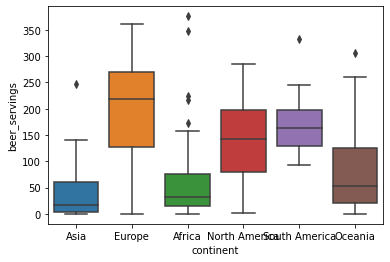

In [17]:
import seaborn as sns
sns.boxplot(x = 'continent', y = 'beer_servings', data = dfBeer)
#Europeans drink the most, followed by people from north and south America and Australians.
#Outliers from certain African countries suggest that heavy drinking happens in some regions of that continent.

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


Pearson  0.5271716935065209 P-Value  3.378401743961718e-15


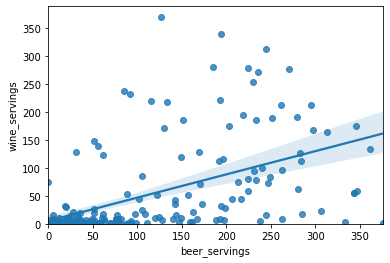

In [18]:
sns.regplot(x = "beer_servings", y = "wine_servings", data = df)
plt.ylim(0,)

pearsonWine, p_valWine = stats.pearsonr(df['beer_servings'], df['wine_servings'])
print("Pearson ", pearsonWine, "P-Value ", p_valWine)

In [19]:
print("""There appears to be a strong positive correlation between the number of beer servings with the number of wine servings, as shown by the 
regression plot and the correlation coefficients (strong correlation + high certainty of correlation)""")

There appears to be a strong positive correlation between the number of beer servings with the number of wine servings, as shown by the 
regression plot and the correlation coefficients (strong correlation + high certainty of correlation)


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x = df[["wine_servings"]] #predictor variable
y = df[["total_litres_of_pure_alcohol"]] #target variable

lm.fit(x, y)
Yhat = lm.predict(x)
#print(Yhat)
print(lm.intercept_)
print(lm.coef_)

[3.15407943]
[[0.03160757]]


<AxesSubplot:xlabel='wine_servings'>

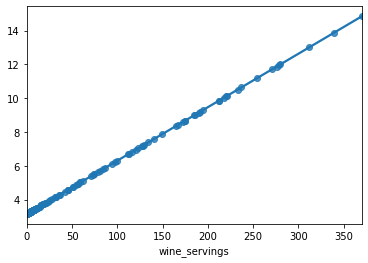

In [21]:
sns.regplot(x = 'wine_servings', y = Yhat, data = df) #there appears to be a positive correlation between wine servings and total alcohol

In [22]:
#R-squared value:
print(lm.score(x, y)) #R should be between 0 and 1, OK
#approximately 44.6% of the total alcohol consumption is accounted for by wine servings

0.4456875459787605


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [71]:
from sklearn.model_selection import train_test_split

#country	beer_servings	spirit_servings	wine_servings	total_litres_of_pure_alcohol	continent
x_data = df.drop(['country', 'continent', 'total_litres_of_pure_alcohol'], axis = 1)
xTrain, xTest, yTrain, yTest = train_test_split(x_data, df['total_litres_of_pure_alcohol'], test_size = 0.1, random_state = 0)

print(xTest.shape[0], xTrain.shape[0])

20 173


In [72]:
print(x_data.head(1))

   beer_servings  spirit_servings  wine_servings
0              0                0              0


In [24]:
linReg = LinearRegression()

In [75]:
linReg.fit(xTrain, yTrain)
linReg.score(xTest, yTest)

0.6990304512837943

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


In [35]:
#pr = PolynomialFeatures(include_bias = False)
#pr.fit_transform(xTest)

In [36]:
#SCALE = StandardScaler()
#SCALE.fit(x_data)
#x_scale=SCALE.transform(x_data)

In [77]:
Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [78]:
pipe = Pipeline(Input)

In [79]:
pipe.fit(xTrain[["beer_servings", "spirit_servings", "wine_servings"]], yTrain)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
yHatPipeline = pipe.predict(xTrain[["beer_servings", "spirit_servings", "wine_servings"]])

In [81]:
print(yHatPipeline[:5])

[1.21017029 0.9400267  0.67483964 1.46189861 1.73360873]


In [82]:
xR = x_data[["beer_servings", "spirit_servings", "wine_servings"]]
yR = y
linM = LinearRegression()
linM.fit(xTest, yTest)


LinearRegression()

In [83]:
linM.score(xTest, yTest)

0.7067463833426811

In [84]:
rSquareTest = []
order = [1, 2, 3, 4]
for n in order:
    polyReg = PolynomialFeatures(degree = n)
    xTrainPR = polyReg.fit_transform(xTrain)
    xTestPR = polyReg.fit_transform(xTest)
    linM.fit(xTrainPR, yTrain)
    rSquareTest.append(linM.score(xTestPR, yTest))

print(rSquareTest)

[0.6990304512837944, 0.707637613388604, 0.7152842453015493, 0.734607828473983]


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [85]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(xR, y)
print(RidgeModel)

RidgeModel.score(xR, y)

Ridge(alpha=0.1)


0.8741728224192626

<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [86]:
polyRFinal = PolynomialFeatures(degree = 2)
xTrainFinal = polyRFinal.fit_transform(xTrain)
xTestFinal = polyRFinal.fit_transform(xTest)

ridgeFinal = Ridge(alpha = 0.1)
ridgeFinal.fit(xTrainFinal, yTrain)

Ridge(alpha=0.1)

In [87]:
ridgeFinal.score(xTestFinal, yTest)

0.7076376228095796

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
